[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


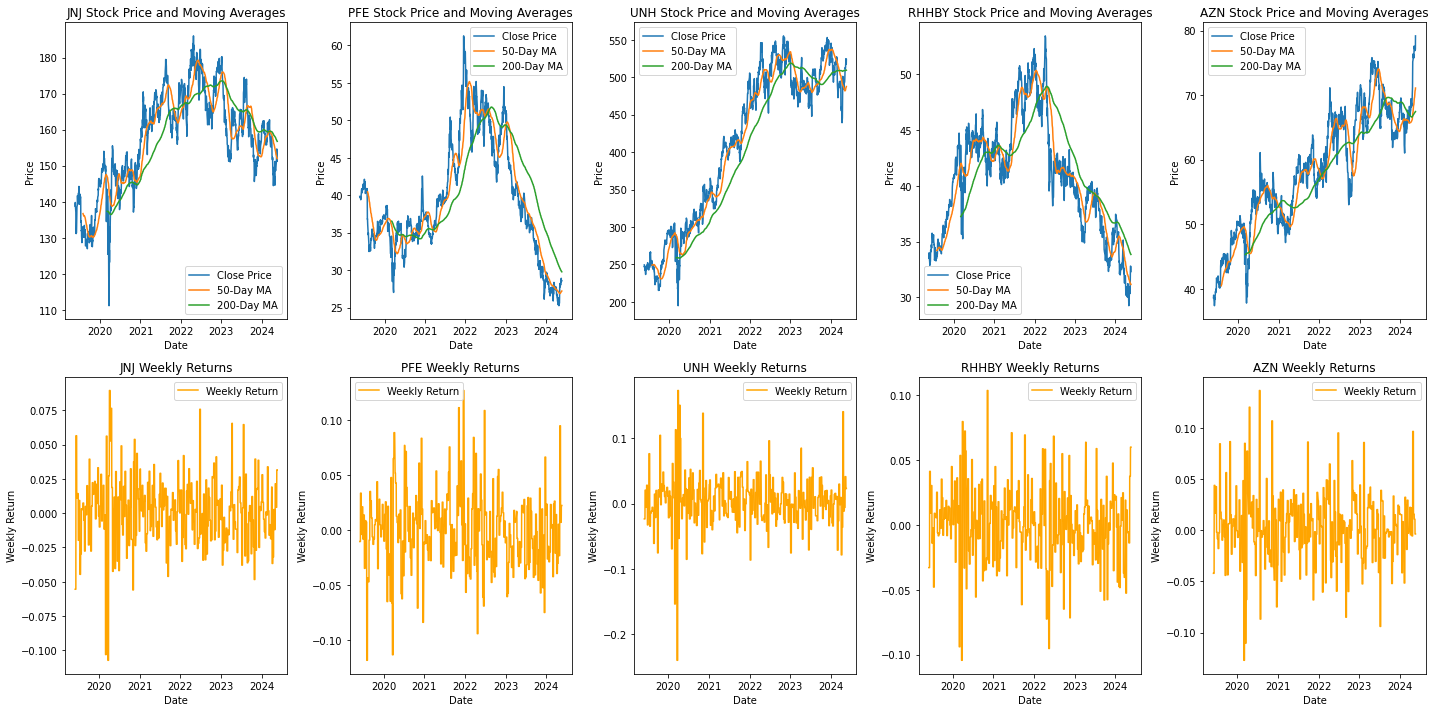

In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define your ticker symbols
tickers = ['JNJ', 'PFE', 'UNH', 'RHHBY', 'AZN']

# Function to download and return historical stock data for the given tickers
def getdata(tickers):
    data = []
    for ticker in tickers:
        stock_data = yf.download(ticker, period='5y').reset_index()
        stock_data['Ticker'] = ticker
        stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()
        stock_data['MA200'] = stock_data['Close'].rolling(window=200).mean()
        data.append(stock_data)
    return data

# Download the data
df_list = getdata(tickers)

# Calculate weekly returns
for df in df_list:
    # Set the 'Date' column as the index
    df.set_index('Date', inplace=True)
    
    # Resample to weekly frequency, taking the last closing price of each week
    weekly_df = df['Close'].resample('W-FRI').last()
    
    # Calculate the weekly rate of return
    weekly_returns = weekly_df.pct_change()
    
    # Reindex the weekly returns to match the original DataFrame index
    weekly_returns = weekly_returns.reindex(df.index, method='ffill')
    
    # Add weekly returns back to the DataFrame
    df['Weekly Return'] = weekly_returns
    
    # Reset the index to include 'Date' in the plot
    df.reset_index(inplace=True)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=len(tickers), figsize=(20, 10))

for i, df in enumerate(df_list):
    ticker = df['Ticker'][0]
    
    # Plot the stock price and moving averages
    axes[0, i].plot(df['Date'], df['Close'], label='Close Price')
    axes[0, i].plot(df['Date'], df['MA50'], label='50-Day MA')
    axes[0, i].plot(df['Date'], df['MA200'], label='200-Day MA')
    axes[0, i].set_title(f'{ticker} Stock Price and Moving Averages')
    axes[0, i].set_xlabel('Date')
    axes[0, i].set_ylabel('Price')
    axes[0, i].legend()
    
    # Plot the weekly returns
    axes[1, i].plot(df['Date'], df['Weekly Return'], label='Weekly Return', color='orange')
    axes[1, i].set_title(f'{ticker} Weekly Returns')
    axes[1, i].set_xlabel('Date')
    axes[1, i].set_ylabel('Weekly Return')
    axes[1, i].legend()

    # Format the x-axis to show year for both rows
    for ax in [axes[0, i], axes[1, i]]:
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Adjust layout
plt.tight_layout()
plt.savefig('MA_WeeklyReturns.jpg')
plt.show()


C:\Users\ntlmp\AppData\Local\Temp\ipykernel_15132\459104967.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  weekly_returns_list.append(weekly_returns.rename(df['Ticker'][0]))


Sample Mean Vector for Weekly Returns:
JNJ      0.000667
PFE     -0.000614
UNH      0.003747
RHHBY    0.000287
AZN      0.003360
dtype: float64

Sample Correlation Matrix:
            JNJ       PFE       UNH     RHHBY       AZN
JNJ    1.000000  0.531304  0.544324  0.489594  0.508163
PFE    0.531304  1.000000  0.429877  0.380320  0.449663
UNH    0.544324  0.429877  1.000000  0.395366  0.384049
RHHBY  0.489594  0.380320  0.395366  1.000000  0.558526
AZN    0.508163  0.449663  0.384049  0.558526  1.000000


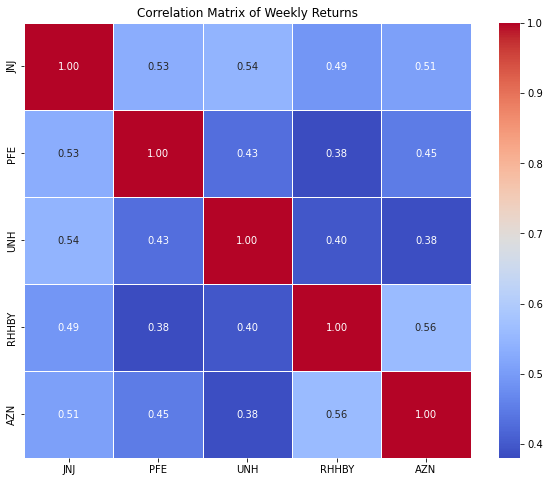

In [13]:
#df_list = getdata(tickers)

# Calculate weekly returns
weekly_returns_list = []
for df in df_list:
    # Set the 'Date' column as the index
    df.set_index('Date', inplace=True)
    
    # Resample to weekly frequency, taking the last closing price of each week
    weekly_df = df['Close'].resample('W-FRI').last()
    
    # Calculate the weekly rate of return
    weekly_returns = weekly_df.pct_change()
    
    # Add weekly returns to the list
    weekly_returns_list.append(weekly_returns.rename(df['Ticker'][0]))

# Combine the weekly returns into a single DataFrame
weekly_returns_df = pd.concat(weekly_returns_list, axis=1)

# Calculate the sample mean vector for weekly returns
mean_vector = weekly_returns_df.mean()
print("Sample Mean Vector for Weekly Returns:")
print(mean_vector)

# Calculate the sample correlation matrix
correlation_matrix = weekly_returns_df.corr()
print("\nSample Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f')
plt.title('Correlation Matrix of Weekly Returns')
plt.savefig('corr.jpg')
plt.show()

In [19]:
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

print("Eigenvalues:")
print(eigenvalues)

# Create a DataFrame for eigenvectors and assign column names
eigenvectors_df = pd.DataFrame(eigenvectors, columns=['E{}'.format(i+1) for i in range(len(eigenvectors))])

# Print the eigenvectors with column names
print("\nEigenvectors:")
print(eigenvectors_df)

Eigenvalues:
[2.87371214 0.70820023 0.58087679 0.4098908  0.42732004]

Eigenvectors:
         E1        E2        E3        E4        E5
0  0.483784  0.209904 -0.042999  0.848531 -0.006392
1  0.432580  0.337189  0.741695 -0.294341 -0.249861
2  0.425277  0.527564 -0.597753 -0.402153  0.147582
3  0.438997 -0.569440 -0.260489 -0.127385 -0.631616
4  0.453044 -0.489549  0.151253 -0.124119  0.718895


In [21]:
(2.87371214 + 0.70820023 + 0.58087679) / 5

0.832557832